This notebook is here to help visualizing the boxes which are seen by Reachy when he is playing TicTacToe. 

These boxes represent the spots that are checked by Reachy to reconstruct the board state. If these boxes are ill-defined, Reachy will not identify correctly what are the pieces and where they are on the board. 

In [1]:
# imports

%matplotlib notebook 

import cv2 as cv 
import numpy as np 

import glob, os 
import matplotlib.pyplot as plt 
import time

from reachy_sdk import ReachySDK

In [2]:
# Connect to Reachy. Be sure that are no other programs that are connected to it.

from reachy_sdk.trajectory import goto
from reachy_sdk.trajectory.interpolation import InterpolationMode
reachy = ReachySDK('localhost')

Lets warm-up a bit Orbita's motors.

This is needed because when the motors are cold, Reachy will not look at the correct position when you give him a look_at.

In [ ]:
reachy.turn_on('head')

time.sleep(1.0)

for _ in range(20):
    reachy.head.look_at(0.5, 0, -0.4, 1)
    time.sleep(0.5)
    reachy.head.look_at(0.5, 0, 0, 1)
    
time.sleep(1.0)

reachy.head.look_at(0.5, 0, 0, 1.5)

reachy.turn_off('head')

Now that the neck motors are warmed up, you can take a picture of the board and check if the board is in the image.

In [24]:
# Get an image and check if the board is in the image

reachy.turn_on('head')
reachy.head.look_at(x=1, y=0, z=0, duration=1.5)  

time.sleep(1.0)

reachy.head.look_at(x=0.5, y=0, z=-0.55, duration=1.5) 
#you can adjust the z parameter to get the board in the image

#_, img = reachy.head.right_camera.read()
img = reachy.right_camera.wait_for_new_frame()

time.sleep(1.0)

reachy.head.look_at(x=1, y=0, z=0, duration=1.5)  

<IPython.core.display.Javascript object>


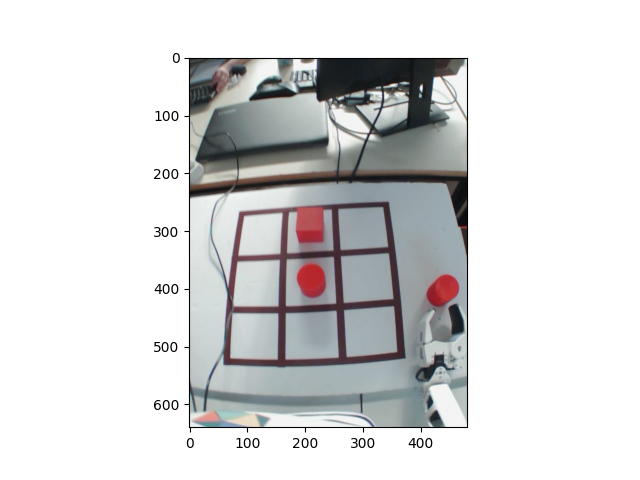

NameError: name 'cv2' is not defined

In [25]:
# Visualize what Reachy saw, adjust z parameter in the look_at until you see the whole board.

plt.figure()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
dst = cv2.cvtColor(src, code)


Once you see the whole board, modify the look_at instruction at the **line 104 of the file tictactoe_playground.py in the analyse_board method** with the z value that you just used.

<img src=img/change_z.png width="600" height="600">

Then, you need to focus on getting the coordinates of each board case.

Reachy does not detect where each case is on the board is. In fact, we just give him the coodinates of each spot individually so that he can run his detection model on each case and determine what is a game piece in it.

To obtain the coordinate of each board case, you'll have to use the cursor on the board image to get for each case:
* the x and y coordinates of the bottom left corner (Xbl, Ybl)
* the x of the bottom right corner (Xbr, Ybr)
* the y of the bottom right corner (Xtr, Ytr)

For example, in the first case of the image below Xbl = 209, Xbr = 316, Ytr = 253, Ybr = 346. 

<img src=img/numbered_boxes.png width="800" height="800">

In [26]:
board_cases = np.array((
    ((81, 166, 260, 340), #Coordinates first board cases (top-left corner) (Xbl, Xbr, Ytr, Ybr)
     (166, 258, 260, 340), #Coordinates second board cases
     (258, 349, 260, 340),),

    ((74, 161, 340, 432),
     (161, 261, 340, 432),
     (261, 360, 340, 432),),

    ((65, 161, 432, 522),
     (161, 266, 432, 522),
     (266, 365, 432, 522),),
))

Once the board_cases array completed, you can check if you did it correctly by getting each box individually.

<IPython.core.display.Javascript object>


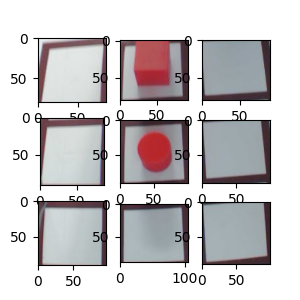

In [27]:
fig=plt.figure(figsize=(3, 3))

for row in range(3):
    for col in range(3):
        xl, xr, yt, yb = board_cases[row, col]
        fig.add_subplot(3, 3, 3*row+col+1)
        plt.imshow(cv.cvtColor(img[yt:yb, xl:xr], cv.COLOR_BGR2RGB))

If this is correct, you can replay the board_cases array of the file **vision.py line 29** by the one you just completed.

Finally, get the coordinates of the whole board just like you did for the board cases, by considering the board as a big case. Knowing where the board is in the image will help Reachy determine if it can play or not. For example if the board is messy, if someone has his hands on the board, Reachy will not play.

<img src=img/board_coordinates.png width="500" height="500">

Put the coordinates in a np.array object 'board_rect'. Replace the exisitng 'board_rect' in **vision.py line 43** with your own. 

In [2]:
# left, right, top, bottom
board_rect = np.array((
    74, 384, 216, 483,
))

NameError: name 'np' is not defined